In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

sns.set_palette("colorblind")

def get_results_attack(dataset):
    # Read the CSV file from the results directory
    results_mixup = pd.read_csv(f'results/output_attack_{dataset}_mixup.csv')
    results_tvae = pd.read_csv(f'results/output_attack_{dataset}_TVAE.csv')
    results_ctgan = pd.read_csv(f'results/output_attack_{dataset}_CTGAN.csv')
    results_CTAB = pd.read_csv(f'results/output_attack_{dataset}_CTAB-GAN.csv')

    return results_mixup, results_tvae, results_ctgan, results_CTAB

def get_results_utility(dataset):
    # Read the CSV file from the results directory
    results_mixup = pd.read_csv(f'results/output_utility_{dataset}_mixup.csv')
    results_tvae = pd.read_csv(f'results/output_utility_{dataset}_TVAE.csv')
    results_ctgan = pd.read_csv(f'results/output_utility_{dataset}_CTGAN.csv')
    results_CTAB = pd.read_csv(f'results/output_utility_{dataset}_CTAB-GAN.csv')

    return results_mixup, results_tvae, results_ctgan, results_CTAB

def get_results_privacy(dataset):
    # Read the CSV file from the results directory
    results_mixup = pd.read_csv(f'results/output_privacy_{dataset}_mixup.csv')
    results_tvae = pd.read_csv(f'results/output_privacy_{dataset}_TVAE.csv')
    results_ctgan = pd.read_csv(f'results/output_privacy_{dataset}_CTGAN.csv')
    results_CTAB = pd.read_csv(f'results/output_privacy_{dataset}_CTAB-GAN.csv')

    return results_mixup, results_tvae, results_ctgan, results_CTAB

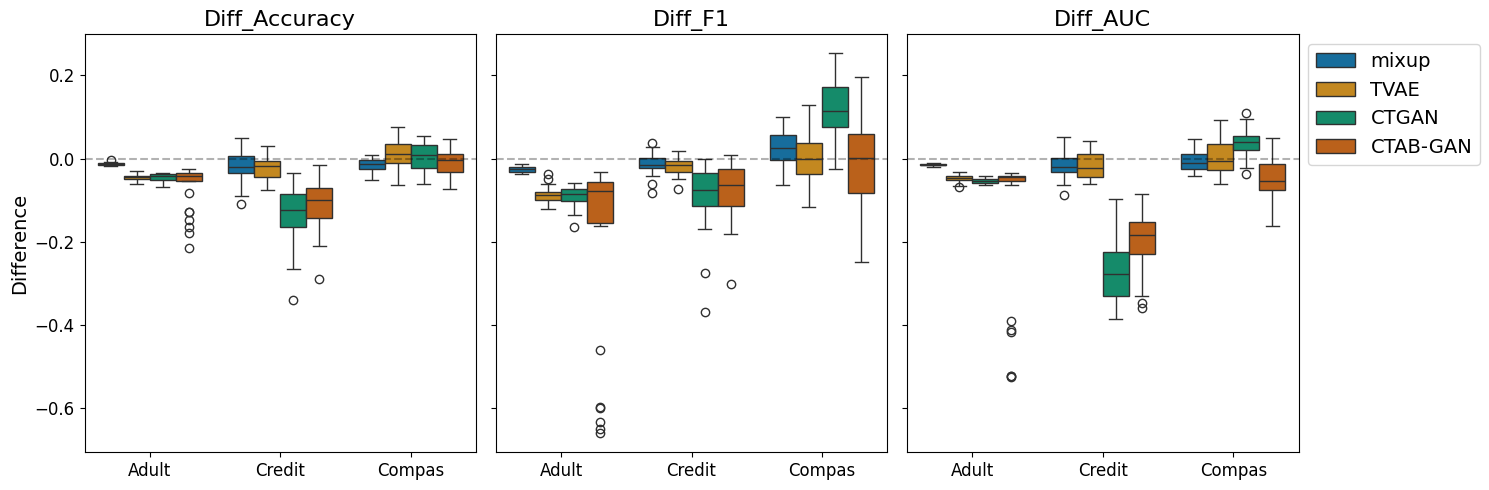

In [4]:
results_mixup_adult, results_tvae_adult, results_ctgan_adult, results_ctabgan_adult = get_results_utility('adult')
results_mixup_credit, results_tvae_credit, results_ctgan_credit, results_ctabgan_credit = get_results_utility('credit')
results_mixup_compas, results_tvae_compas, results_ctgan_compas, results_ctabgan_compas = get_results_utility('compas')

combined_results_adult = pd.concat([results_mixup_adult, results_tvae_adult, results_ctgan_adult, results_ctabgan_adult])
combined_results_credit = pd.concat([results_mixup_credit, results_tvae_credit, results_ctgan_credit, results_ctabgan_credit])
combined_results_compas = pd.concat([results_mixup_compas, results_tvae_compas, results_ctgan_compas, results_ctabgan_compas])

combined_results = pd.concat([combined_results_adult, combined_results_credit, combined_results_compas])
combined_results['Dataset'] = combined_results['Dataset_ID'].map(lambda x: x.split('_')[0]).map({'adult': 'Adult', 'credit': 'Credit', 'compas': 'Compas'})

df_melted = combined_results.melt(id_vars=['Generator', 'Dataset'], 
                    value_vars=['Diff_Accuracy', 'Diff_F1', 'Diff_AUC'], 
                    var_name='Metric', 
                    value_name='Difference')


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

title_fontsize = 16
label_fontsize = 14
legend_fontsize = 14
tick_fontsize = 12

for column, axis in zip(['Diff_Accuracy', 'Diff_F1', 'Diff_AUC'],axes):
    sns.boxplot(data=df_melted[df_melted['Metric'] == column], x='Dataset', y='Difference', hue='Generator', ax=axis)
    axis.set_title(f'{column}', fontsize=title_fontsize)
    axis.set_xlabel('')
    axis.set_ylabel('Difference', fontsize=label_fontsize)
    axis.axhline(0, color='black', linestyle='--', alpha=0.3)
    axis.tick_params(axis='both', labelsize=tick_fontsize)

    #plot the legend only at the last plot, outside the plot
    if column == 'Diff_AUC':
        axis.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=legend_fontsize)
    else:
        axis.get_legend().remove()

plt.tight_layout()
plt.savefig('plot_utility.pdf', format='pdf', bbox_inches='tight')
plt.show()

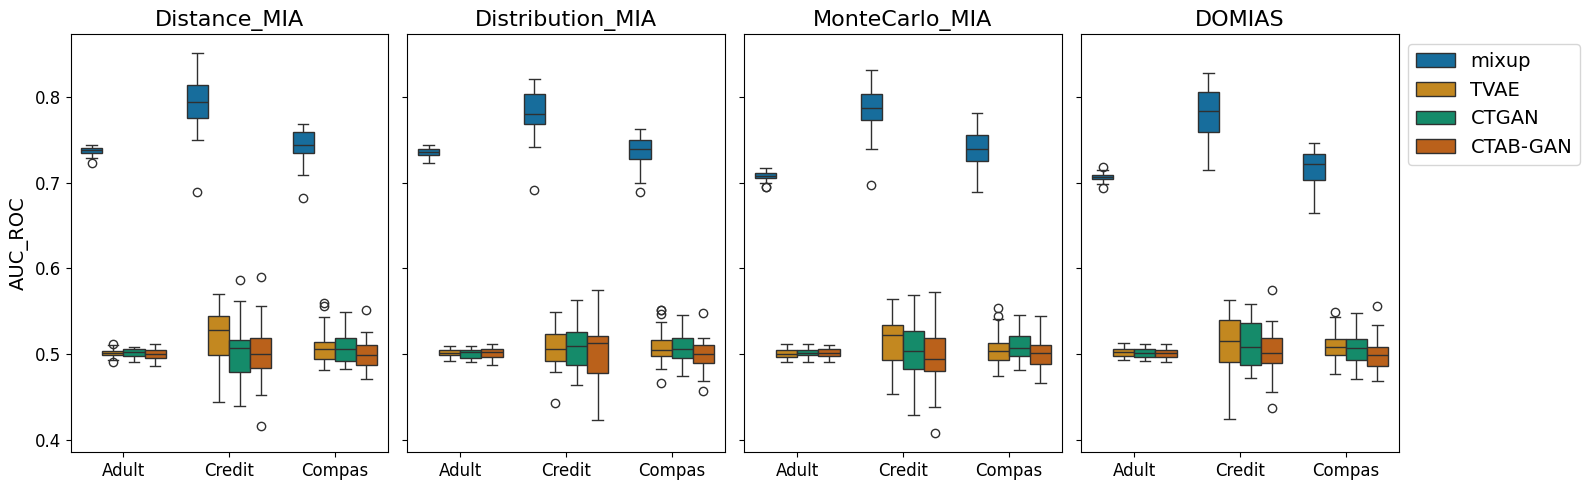

In [5]:
results_mixup_adult, results_tvae_adult, results_ctgan_adult, results_ctabgan_adult = get_results_attack('adult')
results_mixup_credit, results_tvae_credit, results_ctgan_credit, results_ctabgan_credit = get_results_attack('credit')
results_mixup_compas, results_tvae_compas, results_ctgan_compas, results_ctabgan_compas = get_results_attack('compas')

combined_results_adult = pd.concat([results_mixup_adult, results_tvae_adult, results_ctgan_adult, results_ctabgan_adult])
combined_results_credit = pd.concat([results_mixup_credit, results_tvae_credit, results_ctgan_credit, results_ctabgan_credit])
combined_results_compas = pd.concat([results_mixup_compas, results_tvae_compas, results_ctgan_compas, results_ctabgan_compas])

combined_results = pd.concat([combined_results_adult, combined_results_credit, combined_results_compas])
combined_results['Dataset'] = combined_results['Dataset_ID'].map(lambda x: x.split('_')[0]).map({'adult': 'Adult', 'credit': 'Credit', 'compas': 'Compas'})

fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=True)

title_fontsize = 16
label_fontsize = 14
legend_fontsize = 14
tick_fontsize = 12

for column, axis in zip(['Distance_MIA', 'Distribution_MIA', 'MonteCarlo_MIA', 'DOMIAS'],axes):
    sns.boxplot(data=combined_results[combined_results['Attack_Name'] == column], x='Dataset', y='AUC_ROC', hue='Generator', ax=axis)
    axis.set_title(f'{column}', fontsize=title_fontsize)
    axis.set_xlabel('')
    axis.set_ylabel('AUC_ROC', fontsize=label_fontsize)

    axis.tick_params(axis='both', labelsize=tick_fontsize)


    #plot the legend only at the last plot, outside the plot
    if column == 'DOMIAS':
        axis.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=legend_fontsize)
    else:
        axis.get_legend().remove()

plt.tight_layout()
plt.savefig('plot_attack.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Privacy analysis

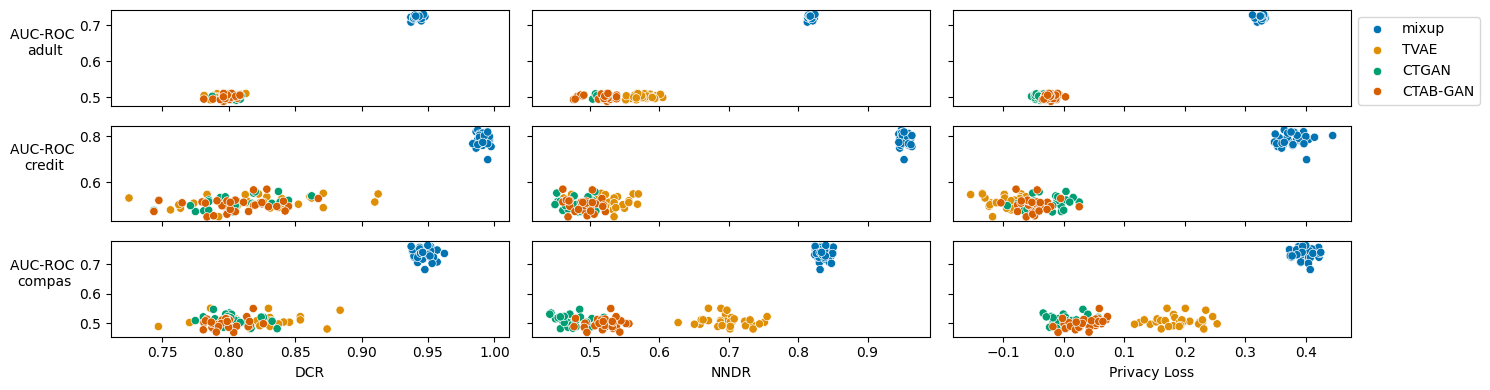

In [13]:
privacy_metrics = ['DCR', 'NNDR', 'Privacy Loss']
datasets = ['adult', 'credit', 'compas']

# Create a figure with 4 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 4), sharey='row', sharex='col')
for metric in privacy_metrics:
    for dataset in datasets:
        #recovering both attack and privacy results, we can correlate for each generator and split the results
        results_mixup_attack, results_tvae_attack, results_ctgan_attack, results_CTAB_attack = get_results_attack(dataset)
        results_mixup_privacy, results_tvae_privacy, results_ctgan_privacy, results_CTAB_privacy = get_results_privacy(dataset)

        # Merge the attack and privacy results for each generator
        results_mixup = results_mixup_attack.merge(results_mixup_privacy, on='Dataset_ID')
        results_tvae = results_tvae_attack.merge(results_tvae_privacy, on='Dataset_ID')
        results_ctgan = results_ctgan_attack.merge(results_ctgan_privacy, on='Dataset_ID')
        results_ctab = results_CTAB_attack.merge(results_CTAB_privacy, on='Dataset_ID')

        results_mixup_avg = results_mixup.groupby(['Dataset_ID', 'Generator_x'])[[metric, 'AUC_ROC']].mean().reset_index()
        results_tvae_avg = results_tvae.groupby(['Dataset_ID', 'Generator_x'])[[metric, 'AUC_ROC']].mean().reset_index()
        results_ctgan_avg = results_ctgan.groupby(['Dataset_ID', 'Generator_x'])[[metric, 'AUC_ROC']].mean().reset_index()
        results_ctab_avg = results_ctab.groupby(['Dataset_ID', 'Generator_x'])[[metric, 'AUC_ROC']].mean().reset_index()


        ax_plot = axs[datasets.index(dataset) % 3, privacy_metrics.index(metric) % 3]

        # Merge the results for all generators
        combined_results = pd.concat([results_mixup_avg, results_tvae_avg, results_ctgan_avg, results_ctab_avg], axis=0)

        # Create a boxplot for each generator
        sns.scatterplot(data=combined_results, x=f'{metric}', y='AUC_ROC',hue='Generator_x',ax=ax_plot)
        
        # remove the x and y labels
        if dataset == 'compas':
            ax_plot.set_xlabel(metric)
        else:
            ax_plot.set_xlabel('')
        ax_plot.set_ylabel('')

        #plot the legend only at the last plot, outside the plot
        if metric == 'Privacy Loss' and dataset == 'adult':
            ax_plot.legend(bbox_to_anchor=(1, 1), loc='upper left')
        else:
            ax_plot.get_legend().remove()

# x axis of the overall plot is the type of attack, the y is the dataset
for ax, dataset in zip(axs[:, 0], datasets):
    ax.set_ylabel(f"AUC-ROC \n{dataset}", rotation=0, labelpad=25)

# Adjust the layout
plt.tight_layout()

plt.savefig('plot_metric.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

# privacy metric analysis

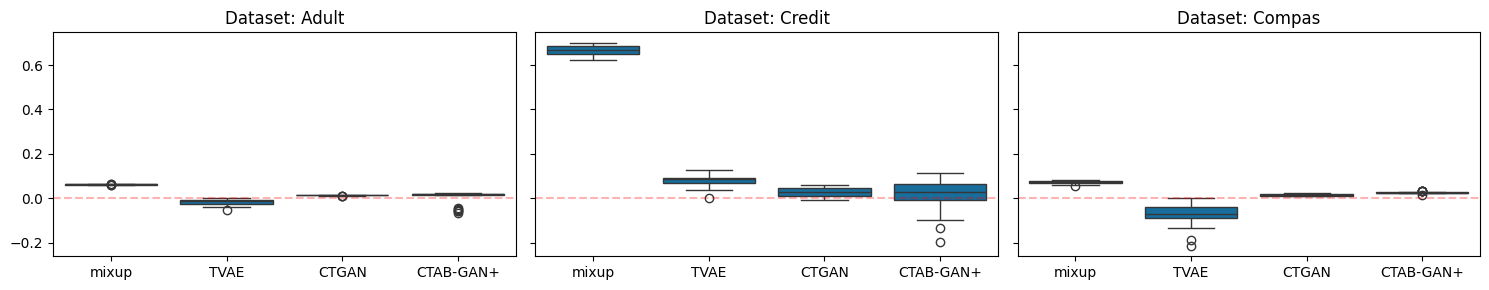

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

identifier = list(range(1, 31))
results = []

for dataset in ['adult', 'credit', 'compas']:
    for id in identifier:
        directory_name = f"{dataset}_{id}"
        directory_path = os.path.join('split', directory_name)

        if not os.path.exists(directory_path):
            raise FileNotFoundError(f"For dataset compas folder with identifier {id} does not exist inside split")

        train_file_path = os.path.join(directory_path, "train.csv")
        test_file_path = os.path.join(directory_path, "test.csv")

        training_data = pd.read_csv(train_file_path)
        test_data = pd.read_csv(test_file_path)

        scaler = MinMaxScaler().fit(training_data)

        training_data = scaler.transform(training_data)
        test_data = scaler.transform(test_data)
        distances_test = np.min(pairwise_distances(training_data, test_data), axis=1)

        generators = []
        for generator_name in ['mixup', 'TVAE', 'CTGAN', 'CTAB-GAN']:
            synthetic = pd.read_csv(os.path.join('synthetic', generator_name, directory_name, "synthetic.csv"))
            synthetic = scaler.transform(synthetic)

            distances_synthetic = np.min(pairwise_distances(training_data, synthetic), axis=1)

            dcr_train = (distances_test - distances_synthetic)
            generators = generators + [np.median(dcr_train)]
        
        results.append([directory_name] + generators)

df_results = pd.DataFrame(results, columns=["ID", 'mixup', 'TVAE', 'CTGAN', 'CTAB-GAN+'])
df_results['Dataset'] = df_results['ID'].map(lambda x: x.split('_')[0]).map({'adult': 'Adult', 'credit': 'Credit', 'compas': 'Compas'})
df_melted = df_results.melt(id_vars=["ID", "Dataset"], var_name="Generator", value_name="Metric")

fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, dataset in enumerate(['Adult', 'Credit', 'Compas']):
    sns.boxplot(data=df_melted[df_melted["Dataset"] == dataset], x="Generator", y="Metric", ax=axes[i])
    axes[i].set_title(f"Dataset: {dataset}")
    axes[i].set_xlabel("")
    axes[i].axhline(0, color='red', linestyle='--', alpha=0.3)
    axes[i].set_ylabel("")

plt.tight_layout()
plt.savefig('plot_proximity_analysis.pdf', format='pdf', bbox_inches='tight')
plt.show()